<a href="https://colab.research.google.com/github/faizygithub/-Deep-Learning-with-PyTorch/blob/master/Batch_normalization_with_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import seaborn as sns


In [0]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
6


In [0]:
def imshow(img, title):
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [0]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

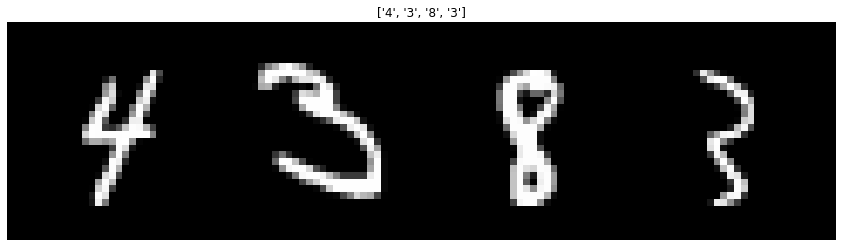

In [0]:
images, labels = show_batch_images(trainloader)

In [0]:
class CNN_BN(nn.Module):
    def __init__(self): 
        super(CNN_BN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 3, 5),         # (N, 1, 28, 28) -> (N,  3, 24, 24)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 3, 24, 24) -> (N,  3, 12, 12)
            nn.Conv2d(3, 6, 3),
            nn.BatchNorm2d(6)           # (N, 3, 12, 12) -> (N,  6, 10, 10) 
        )
        self.features1 = nn.Sequential(
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N, 6, 10, 10) -> (N,  6, 5, 5)
        )
        self.classifier = nn.Sequential(
            nn.Linear(150, 25),         # (N, 150) -> (N, 25)
            nn.ReLU(),
            nn.Linear(25,10)            # (N, 25) -> (N, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.features1(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [0]:
model_cnn_bn=CNN_BN()
print(model_cnn_bn)

CNN_BN(
  (features): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (features1): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Linear(in_features=150, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=10, bias=True)
  )
)


In [0]:
batch_size = 512

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model_cnn_bn.parameters(), lr=0.01)
#opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

No handles with labels found to put in legend.


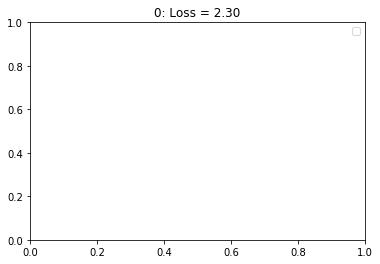

No handles with labels found to put in legend.


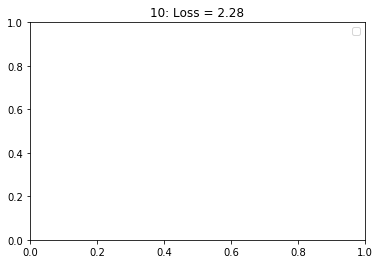

No handles with labels found to put in legend.


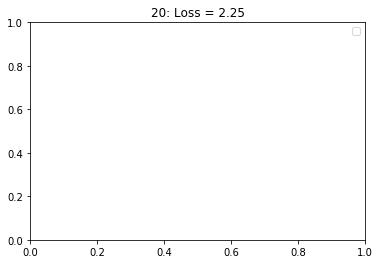

No handles with labels found to put in legend.


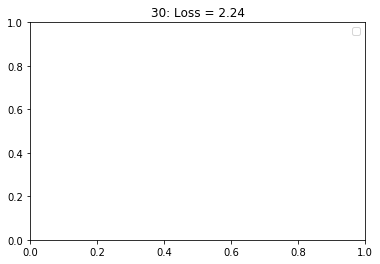

No handles with labels found to put in legend.


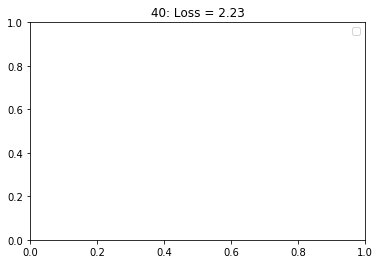

No handles with labels found to put in legend.


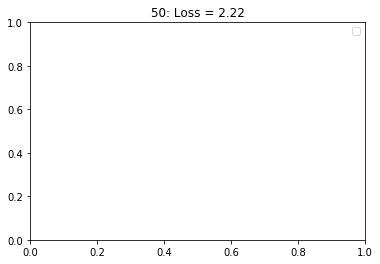

No handles with labels found to put in legend.


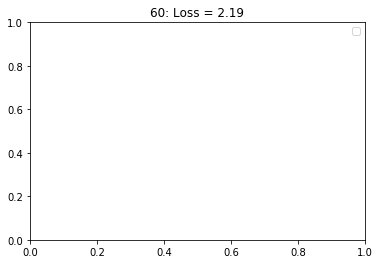

No handles with labels found to put in legend.


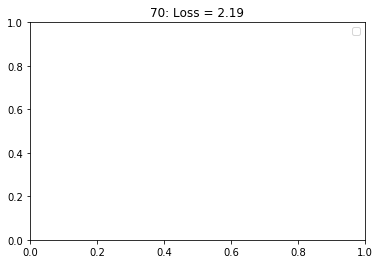

No handles with labels found to put in legend.


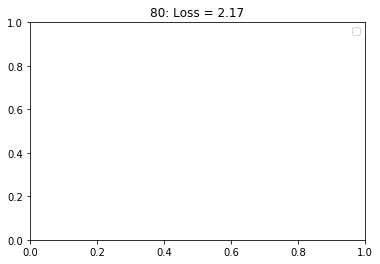

No handles with labels found to put in legend.


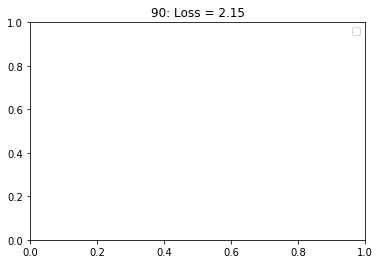

No handles with labels found to put in legend.


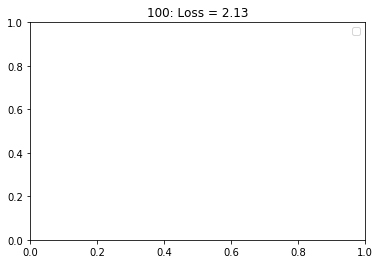

No handles with labels found to put in legend.


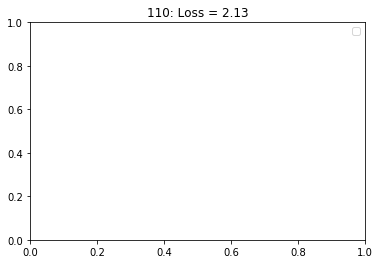

----------------------


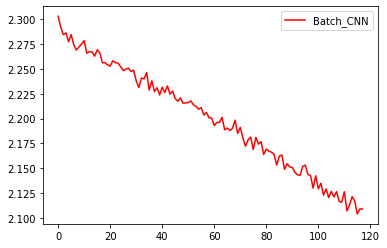

No handles with labels found to put in legend.


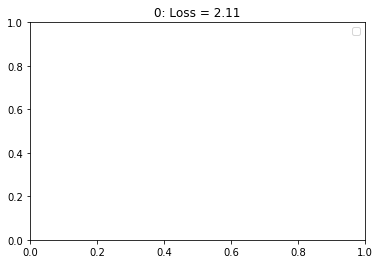

No handles with labels found to put in legend.


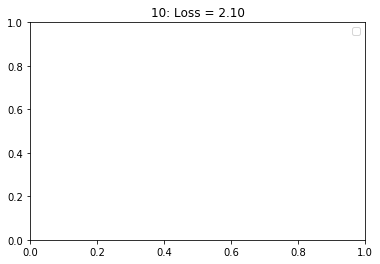

No handles with labels found to put in legend.


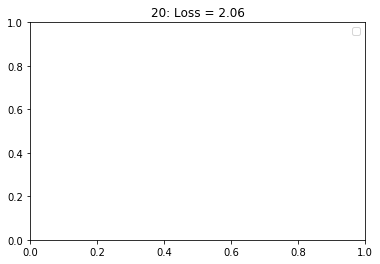

No handles with labels found to put in legend.


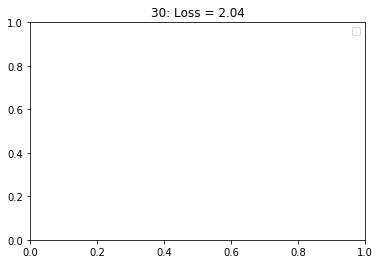

No handles with labels found to put in legend.


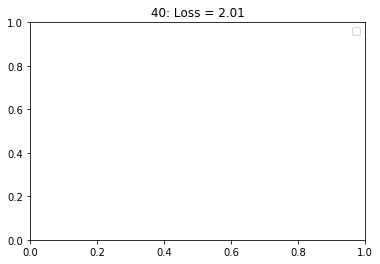

No handles with labels found to put in legend.


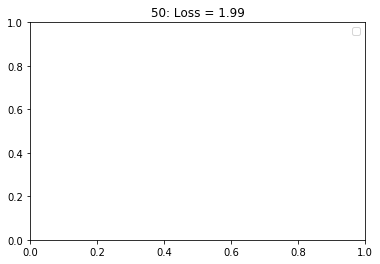

No handles with labels found to put in legend.


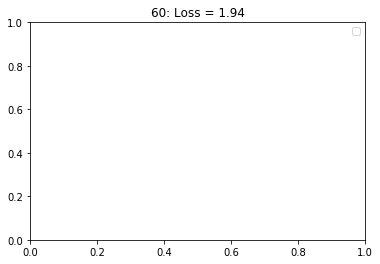

No handles with labels found to put in legend.


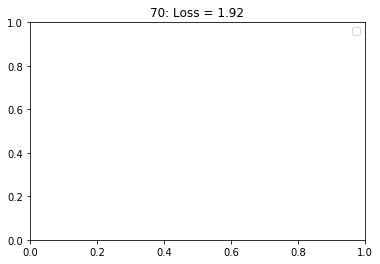

No handles with labels found to put in legend.


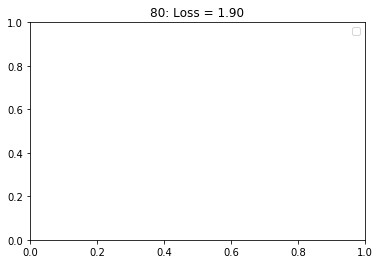

No handles with labels found to put in legend.


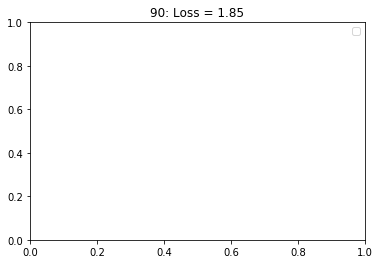

No handles with labels found to put in legend.


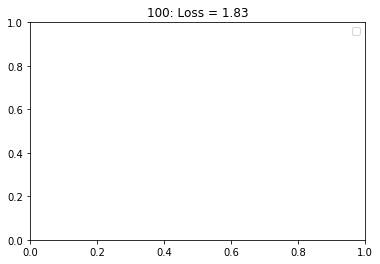

No handles with labels found to put in legend.


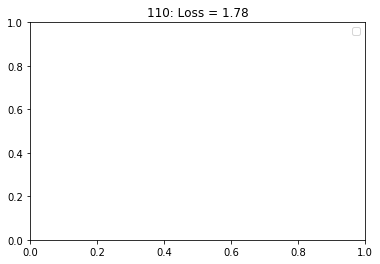

----------------------


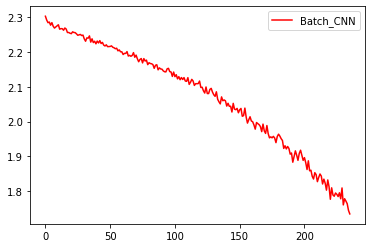

In [0]:
loss_arr = []
#loss_bn_arr = []

max_epochs = 2

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        # training steps for normal model
        opt.zero_grad()
        outputs = model_cnn_bn(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        # training steps for bn model
        #opt_bn.zero_grad()
        #outputs_bn = model_bn(inputs)
        #loss_bn = loss_fn(outputs_bn, labels)
        #loss_bn.backward()
        #opt_bn.step()
        
        loss_arr.append(loss.item())
        #loss_bn_arr.append(loss_bn.item())
        
        if i % 10 == 0:
        
            inputs = inputs.view(inputs.size(0), -1)
            
            model_cnn_bn.eval()
            #model_bn.eval()
            
#            a = model_cnn_bn.classifier[0](inputs)
#             a = model.classifier[1](a)
#             a = model.classifier[2](a)
#            a = a.detach().numpy().ravel()
#            sns.distplot(a, kde=True, color='r', label='Batch_CNN') 
            
           # b = model_bn.classifier[0](inputs)
            #b = model_bn.classifier[1](b)
#             b = model_bn.classifier[2](b)
#             b = model_bn.classifier[3](b)
#             b = model_bn.classifier[4](b)
            #b = b.detach().numpy().ravel()
            
            #sns.distplot(b, kde=True, color='g', label='BatchNorm') 
            plt.title('%d: Loss = %0.2f' % (i, loss.item() ))
            plt.legend()
            plt.show()
            plt.pause(0.5)
            
            model_cnn_bn.train()
            #model_bn.train()
        
        
    print('----------------------')

    plt.plot(loss_arr, 'r', label='Batch_CNN')
    #plt.plot(loss_bn_arr, 'g', label='BatchNorm')
    plt.legend()
    plt.show()

In [0]:
trainset = torchvision.datasets.CIFAR10(root='./data1', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
3


In [0]:
def imshow(img, title):
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [0]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

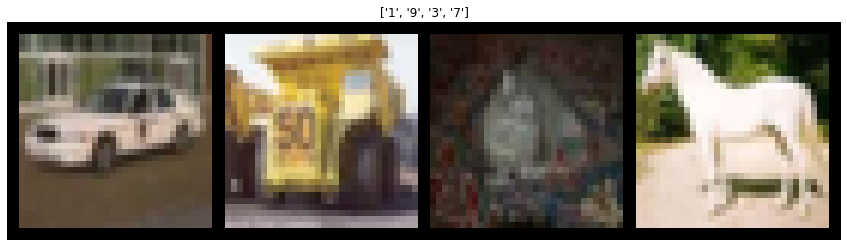

In [0]:
images, labels = show_batch_images(trainloader)

In [0]:
class CNN_BN(nn.Module):
    def __init__(self): 
        super(CNN_BN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 3, 5),         # (N, 3, 32, 32) -> (N,  3, 28, 28)
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 3, 28, 28) -> (N,  3, 14, 14)
            nn.Conv2d(3, 6, 3),
            nn.Dropout(0.2),
            nn.BatchNorm2d(6)           # (N, 3, 14, 14) -> (N,  6, 12, 12) 
        )
        self.features1 = nn.Sequential(
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N, 6, 12, 12) -> (N,  6, 6, 6)
        )
        self.classifier = nn.Sequential(
            nn.Linear(216, 25),         # (N, 216) -> (N, 25)
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(25,10)            # (N, 25) -> (N, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.features1(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [0]:
batch_size = 512

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model_cnn_bn.parameters(), lr=0.01)
#opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

In [0]:
loss_arr = []
#loss_bn_arr = []

max_epochs = 2

for epoch in range(max_epochs):

    for i, data1 in enumerate(trainloader, 0):

        inputs, labels = data1

        # training steps for normal model
        opt.zero_grad()
        outputs = model_cnn_bn(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        # training steps for bn model
        #opt_bn.zero_grad()
        #outputs_bn = model_bn(inputs)
        #loss_bn = loss_fn(outputs_bn, labels)
        #loss_bn.backward()
        #opt_bn.step()
        
        loss_arr.append(loss.item())
        #loss_bn_arr.append(loss_bn.item())
        
        if i % 10 == 0:
        
            inputs = inputs.view(inputs.size(0), -1)
            
            model_cnn_bn.eval()
            #model_bn.eval()
            
#            a = model_cnn_bn.classifier[0](inputs)
#             a = model.classifier[1](a)
#             a = model.classifier[2](a)
#            a = a.detach().numpy().ravel()
#            sns.distplot(a, kde=True, color='r', label='Batch_CNN') 
            
           # b = model_bn.classifier[0](inputs)
            #b = model_bn.classifier[1](b)
#             b = model_bn.classifier[2](b)
#             b = model_bn.classifier[3](b)
#             b = model_bn.classifier[4](b)
            #b = b.detach().numpy().ravel()
            
            #sns.distplot(b, kde=True, color='g', label='BatchNorm') 
            plt.title('%d: Loss = %0.2f' % (i, loss.item() ))
            plt.legend()
            plt.show()
            plt.pause(0.5)
            
            model_cnn_bn.train()
            #model_bn.train()
        
        
    print('----------------------')

    plt.plot(loss_arr, 'r', label='Batch_CNN with Dropout')
    #plt.plot(loss_bn_arr, 'g', label='BatchNorm')
    plt.legend()
    plt.show()